## Hälsostudie DEL 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("health_study_dataset.csv")
df.head(3)

,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0


In [5]:
columns = ["age", "weight", "height", "systolic_bp", "cholesterol"]

summary = pd.DataFrame({
    'mean': df[columns].mean(),
    'median': df[columns].median(),
    'max': df[columns].max(),
    'min': df[columns].min()
})

print(summary)

                   mean  median     max    min
age           49.426250   50.00   90.00   18.0
weight        73.413000   73.20  114.40   33.7
height       171.849250  171.35  200.40  144.4
systolic_bp  149.178625  149.40  185.90  106.8
cholesterol    4.929150    4.97    7.88    2.5


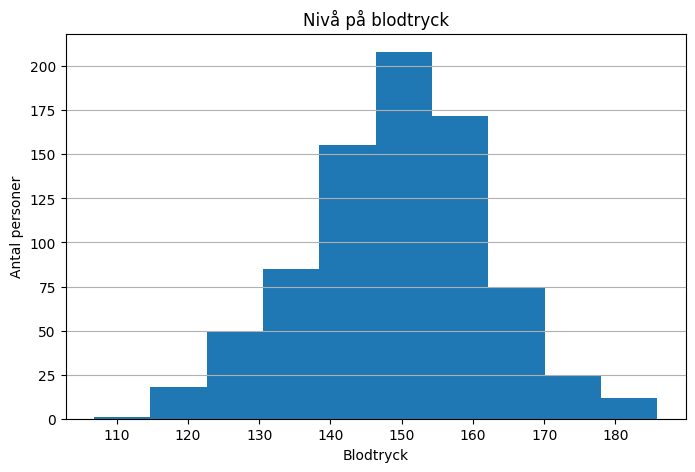

In [62]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df["systolic_bp"], bins=10)
ax.set_title("Nivå på blodtryck")
ax.set_xlabel("Blodtryck")
ax.set_ylabel("Antal personer")
ax.grid(True, axis="y")


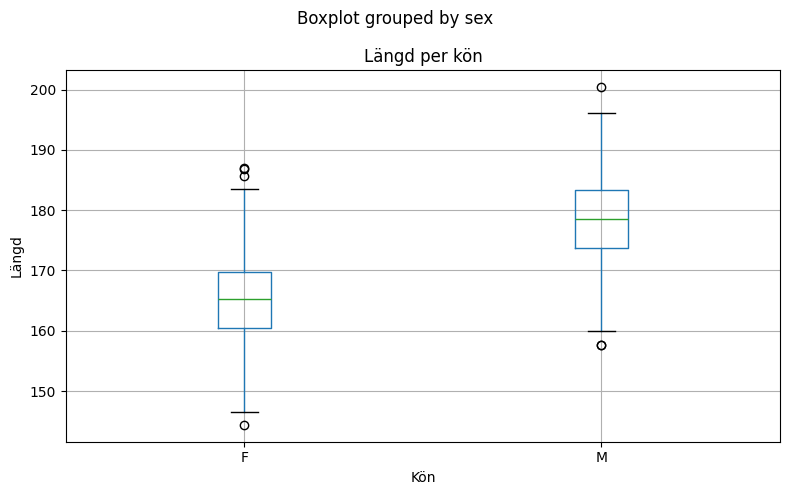

In [61]:
fig, ax = plt.subplots(figsize=(8, 5))
df.boxplot(column="height", by="sex", ax=ax)
ax.set_title("Längd per kön")
ax.set_xlabel("Kön")
ax.set_ylabel("Längd")
plt.tight_layout()

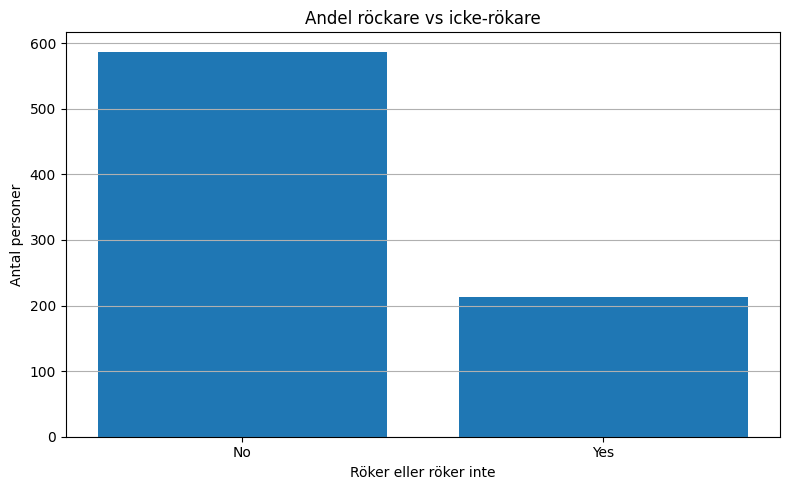

In [63]:
fix, ax = plt.subplots(figsize=(8, 5))
counts = df["smoker"].value_counts()

ax.bar(counts.index, counts.values)
ax.set_title("Andel röckare vs icke-rökare")
ax.set_xlabel("Röker eller röker inte")
ax.set_ylabel("Antal personer")
ax.grid(True, axis="y")
plt.tight_layout()
plt.show()